In [3]:
from pybaseball.lahman import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
Batting = batting()
Batting.loc[Batting['yearID'] == 1871]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,woodji01,1871,1,CH1,NaN,28,135,45,51,10,...,29.0,18.0,2.0,11,3.0,NaN,NaN,NaN,NaN,0.0
111,wrighge01,1871,1,BS1,NaN,16,80,33,33,7,...,11.0,9.0,1.0,6,1.0,NaN,NaN,NaN,NaN,1.0
112,wrighha01,1871,1,BS1,NaN,31,147,42,44,5,...,26.0,7.0,1.0,13,2.0,NaN,NaN,NaN,NaN,0.0
113,yorkto01,1871,1,TRO,NaN,29,145,36,37,5,...,23.0,2.0,2.0,9,1.0,NaN,NaN,NaN,NaN,0.0


In [9]:
Teams = teams()
Teams

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,2018,NL,SLN,STL,C,3,162,81.0,88,74,...,151,0.978,St. Louis Cardinals,Busch Stadium III,3403587.0,97,96,STL,SLN,SLN
2891,2018,AL,TBA,TBD,E,3,162,81.0,90,72,...,136,0.986,Tampa Bay Rays,Tropicana Field,1154973.0,97,97,TBR,TBA,TBA
2892,2018,AL,TEX,TEX,W,5,162,81.0,67,95,...,168,0.980,Texas Rangers,Rangers Ballpark in Arlington,2107107.0,112,113,TEX,TEX,TEX
2893,2018,AL,TOR,TOR,E,4,162,81.0,73,89,...,138,0.983,Toronto Blue Jays,Rogers Centre,2325281.0,97,98,TOR,TOR,TOR


In [11]:
#This represents the number of datapoints (teams) we will have
len(Teams)

2895

In [13]:
'''
Number of features given on the 'Teams' dataset
However, most of these are either not useful,
like the name of the park or the team ID in other databases,
or just clerical like the name of the team and league ID
'''
len(Teams.columns)

48

#### Feature List  
Lahman Features:
* Runs per game  
* Homeruns per game
* Hits per game  
* Pitcher strikeouts per game  
* Batter strikeouts per game  
* Proportion of complete games thrown by pitchers  

Features from elswhere:
* Fly ball percentage  
* Ground ball percentage  
* Average exit velocity  
* Average release velocity  
* Average number of innings pitched per pitcher

In [26]:
#We can start by calculating our Lahman features for the 'Teams' dataset  

#Runs per game
Teams['R_per_G'] = Teams['R'] / Teams['G']

#Homeruns per game
Teams['HR_per_G'] = Teams['HR'] / Teams['G']

#Hits per game
Teams['H_per_G'] = Teams['H'] / Teams['G']

#Pitcher strikeouts per game
Teams['SO_p_per_G'] = Teams['SOA'] / Teams['G']

#Batter strikeouts per game
Teams['SO_b_per_G'] = Teams['SO'] / Teams['G']

#Proportion of games that were complete games
Teams['CG_prop'] = Teams['CG'] / Teams['G']

#Batter walks per game
Teams['BB_per_G'] = Teams['BB'] / Teams['G']

#Singles (used to calculate slugging)
Teams['1B'] = Teams['H'] - (Teams['2B'] + Teams['3B'] + Teams['HR'])

#Team slugging percentage
Teams['SLG'] = (Teams['1B'] + (2*Teams['2B']) + (3*Teams['3B']) + (4*Teams['HR'])) / Teams['AB']

In [27]:
years = Teams['yearID'].unique()
runs_by_year = list(Teams.groupby(['yearID']).mean()['R_per_G'])
hrs_by_year = list(Teams.groupby(['yearID']).mean()['HR_per_G'])
h_by_year = list(Teams.groupby(['yearID']).mean()['H_per_G'])
pitch_so_by_year = list(Teams.groupby(['yearID']).mean()['SO_p_per_G'])
bat_so_by_year = list(Teams.groupby(['yearID']).mean()['SO_b_per_G'])
cg_by_year = list(Teams.groupby(['yearID']).mean()['CG_prop'])
att_by_year = list(Teams.groupby(['yearID']).mean()['attendance'])
bb_by_year = list(Teams.groupby(['yearID']).mean()['BB_per_G'])
slg_by_year = list(Teams.groupby(['yearID']).mean()['SLG'])

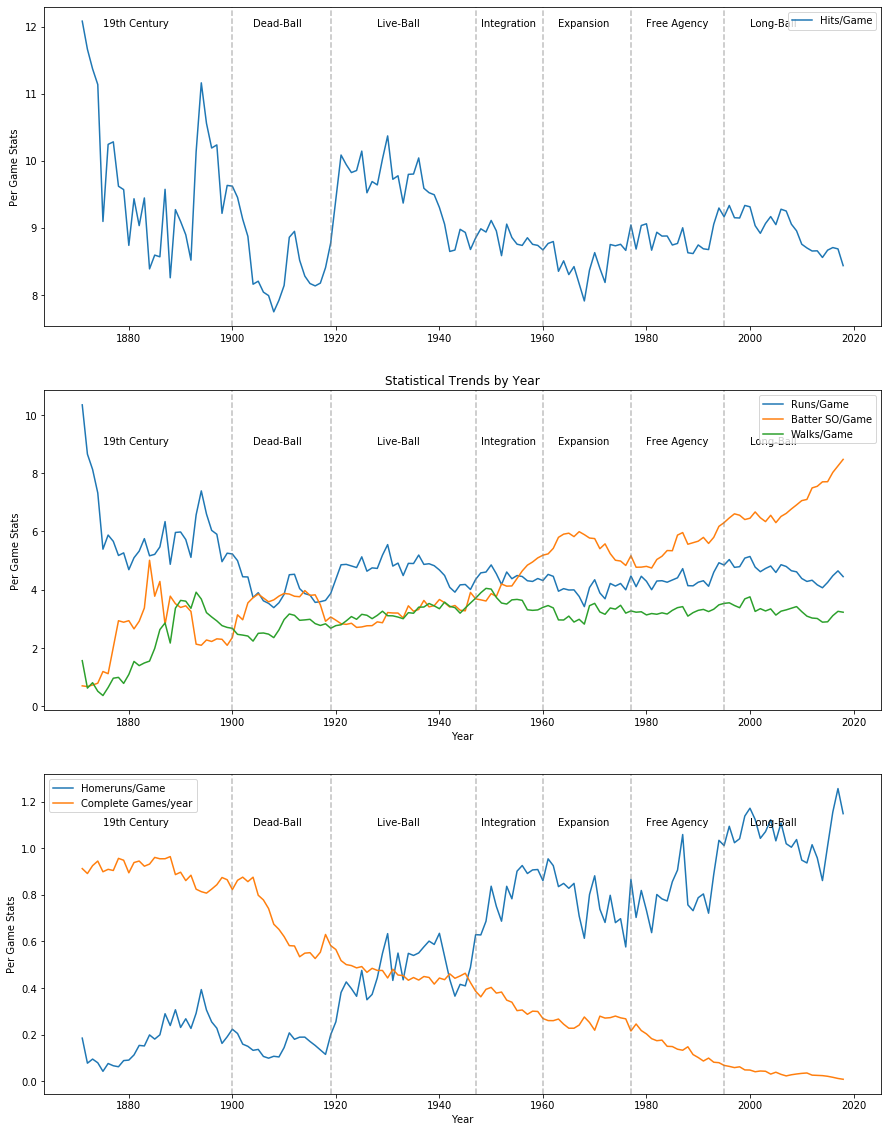

In [33]:
fig,ax = plt.subplots(3,1,figsize=(15,20))
ax[1].plot(years, runs_by_year, label='Runs/Game')
ax[2].plot(years, hrs_by_year, label='Homeruns/Game')
ax[0].plot(years, h_by_year, label='Hits/Game')
#ax[1].plot(years, pitch_so_by_year, label='Pitcher SO/Game')
ax[1].plot(years, bat_so_by_year, label='Batter SO/Game')
ax[2].plot(years, cg_by_year, label='Complete Games/year')
ax[1].plot(years, bb_by_year, label='Walks/Game')
ax[0].axvline(1900, linestyle='--', color='gray', alpha=0.5)
ax[0].axvline(1919, linestyle='--', color='gray', alpha=0.5)
ax[0].axvline(1947, linestyle='--', color='gray', alpha=0.5)
ax[0].axvline(1960, linestyle='--', color='gray', alpha=0.5)
ax[0].axvline(1977, linestyle='--', color='gray', alpha=0.5)
ax[0].axvline(1995, linestyle='--', color='gray', alpha=0.5)
ax[0].text(1875, 12, '19th Century')
ax[0].text(1904, 12, 'Dead-Ball')
ax[0].text(1928, 12, 'Live-Ball')
ax[0].text(1948, 12, 'Integration')
ax[0].text(1963, 12, 'Expansion')
ax[0].text(1980, 12, 'Free Agency')
ax[0].text(2000, 12, 'Long-Ball')
ax[0].set_ylabel('Per Game Stats')
ax[0].legend()
#ax.set_title('Change in Per-game Stats by Year')
ax[1].legend()
ax[1].axvline(1900, linestyle='--', color='gray', alpha=0.5)
ax[1].axvline(1919, linestyle='--', color='gray', alpha=0.5)
ax[1].axvline(1947, linestyle='--', color='gray', alpha=0.5)
ax[1].axvline(1960, linestyle='--', color='gray', alpha=0.5)
ax[1].axvline(1977, linestyle='--', color='gray', alpha=0.5)
ax[1].axvline(1995, linestyle='--', color='gray', alpha=0.5)
ax[1].text(1875, 9, '19th Century')
ax[1].text(1904, 9, 'Dead-Ball')
ax[1].text(1928, 9, 'Live-Ball')
ax[1].text(1948, 9, 'Integration')
ax[1].text(1963, 9, 'Expansion')
ax[1].text(1980, 9, 'Free Agency')
ax[1].text(2000, 9, 'Long-Ball')
ax[1].set_ylabel('Per Game Stats')
ax[1].set_xlabel('Year')
ax[1].set_title('Statistical Trends by Year')
#ax.set_title('Change in Per-game Stats by Year')
ax[1].legend()
ax[2].axvline(1900, linestyle='--', color='gray', alpha=0.5)
ax[2].axvline(1919, linestyle='--', color='gray', alpha=0.5)
ax[2].axvline(1947, linestyle='--', color='gray', alpha=0.5)
ax[2].axvline(1960, linestyle='--', color='gray', alpha=0.5)
ax[2].axvline(1977, linestyle='--', color='gray', alpha=0.5)
ax[2].axvline(1995, linestyle='--', color='gray', alpha=0.5)
ax[2].text(1875, 1.1, '19th Century')
ax[2].text(1904, 1.1, 'Dead-Ball')
ax[2].text(1928, 1.1, 'Live-Ball')
ax[2].text(1948, 1.1, 'Integration')
ax[2].text(1963, 1.1, 'Expansion')
ax[2].text(1980, 1.1, 'Free Agency')
ax[2].text(2000, 1.1, 'Long-Ball')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Per Game Stats')
#ax.set_title('Change in Per-game Stats by Year')
ax[2].legend()

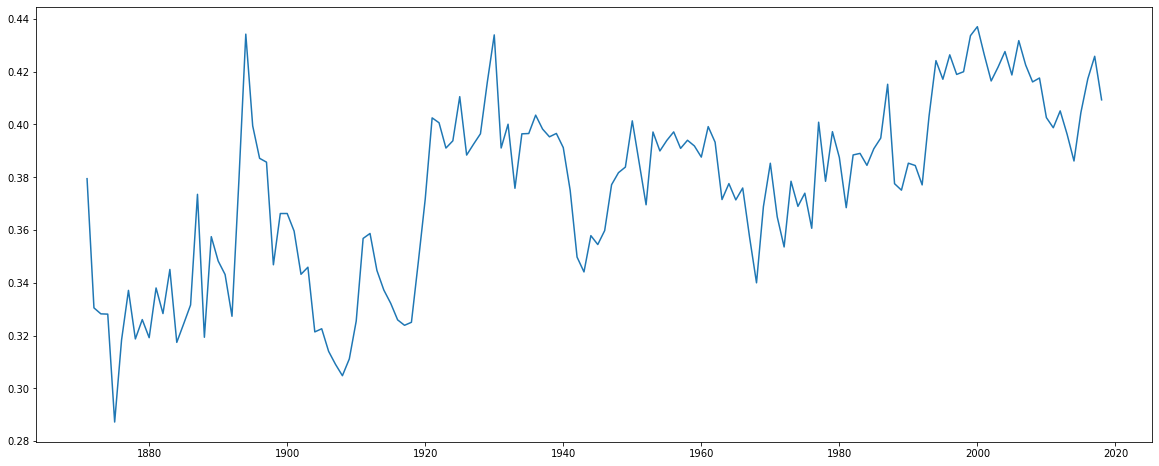

In [28]:
fig,ax = plt.subplots(figsize=(20,8))
ax.plot(years, slg_by_year)